# Using spectral catalog in crispy

In [1]:
from crispy.tools.inputScene import bpgs_list

In [2]:
help(bpgs_list)

Help on function bpgs_list in module crispy.tools.inputScene:

bpgs_list(spectype=None, verbose=True)
    Returns pandas dataframe with the list of the files, the name and the type of the star



In [3]:
bpgs_list('G0V')

           File        Name Type
35  bpgs_36.tab  BD+26D3780  G0V


,File,Name,Type
35,bpgs_36.tab,BD+26D3780,G0V


## From spectral type to photon/s/m2

In [4]:
from crispy.tools.inputScene import bpgs_spectype_to_photonrate
help(bpgs_spectype_to_photonrate)

Help on function bpgs_spectype_to_photonrate in module crispy.tools.inputScene:

bpgs_spectype_to_photonrate(spectype, Vmag, minlam, maxlam)
    Parameters
    ----------
    spectype: string
        String representing the spectral type of the star
    Vmag: float
        V magnitude of star
    minlam: float
        Minimum wavelength of the band in nm    
    maxlam: float
        Maximum wavelength of the band in nm    
    
    Returns
    -------
    val: Quantity
        Photons/second/m2 coming from the star within the band



In [5]:
import astropy.units as u
import numpy as np
phcount = bpgs_spectype_to_photonrate('G0V',5,546.,604.)*3.6825*u.m**2*120*u.s*0.57*0.9
print ('{:e}'.format(phcount))
print ('Compare to 1.38e10 ph in John Krist OS6, {:.2f}% difference'.format(100*np.abs(phcount-1.38e10*u.ph)/phcount))

1.338699e+10 ph
Compare to 1.38e10 ph in John Krist OS6, 3.09% difference


## Other functions available

In [6]:
from crispy.tools.inputScene import bpgs_to_photonrate,bpgsfile_to_photonrate

### From file number to photon rate

In [7]:
help(bpgs_to_photonrate)

Help on function bpgs_to_photonrate in module crispy.tools.inputScene:

bpgs_to_photonrate(specnum, Vmag, minlam, maxlam)
    Parameters
    ----------
    specnum: int
        Number of spectrum file from bpgs folder (in crispy/Input/bpgs folder)
    Vmag: float
        V magnitude of star
    minlam: float
        Minimum wavelength of the band in nm    
    maxlam: float
        Maximum wavelength of the band in nm    
    
    Returns
    -------
    val: Quantity
        Photons/second/m2 coming from the star within the band



In [8]:
import astropy.units as u
import numpy as np
phcount = bpgs_to_photonrate(36,5,546.,604.)*3.6825*u.m**2*120*u.s*0.57*0.9
print ('{:e}'.format(phcount))
print ('Compare to 1.38e10 ph in John Krist OS6, {:.2f}% difference'.format(100*np.abs(phcount-1.38e10*u.ph)/phcount))

1.338699e+10 ph
Compare to 1.38e10 ph in John Krist OS6, 3.09% difference


### From spectral filename to photon rate

In [9]:
help(bpgsfile_to_photonrate)

Help on function bpgsfile_to_photonrate in module crispy.tools.inputScene:

bpgsfile_to_photonrate(filename, Vmag, minlam, maxlam)
    Parameters
    ----------
    filename: string
        Text file corresponding to the bpgs specturm in pysynphot catalog
    Vmag: float
        V magnitude of star
    minlam: float
        Minimum wavelength of the band in nm    
    maxlam: float
        Maximum wavelength of the band in nm    
    
    Returns
    -------
    val: Quantity
        Photons/second/m2 coming from the star within the band



In [10]:
import astropy.units as u
import numpy as np
import pkg_resources
fname = pkg_resources.resource_filename('crispy', 'Inputs') + '/bpgs/bpgs_36.fits'
phcount = bpgsfile_to_photonrate(fname,5,546.,604.)*3.6825*u.m**2*120*u.s*0.57*0.9
print ('{:e}'.format(phcount))
print ('Compare to 1.38e10 ph in John Krist OS6, {:.2f}% difference'.format(100*np.abs(phcount-1.38e10*u.ph)/phcount))

1.338699e+10 ph
Compare to 1.38e10 ph in John Krist OS6, 3.09% difference


## Calculate input stellar spectrum

In [11]:
from crispy.tools.inputScene import input_star

In [12]:
help(input_star)

Help on function input_star in module crispy.tools.inputScene:

input_star(filename, Vmag, wavel)
    Parameters
    ----------
    filename: string
        Text file corresponding to the bpgs specturm in pysynphot catalog
    Vmag: float
        V magnitude of star
    wavel: array
        Array of desired wavelengths in microns
        
    Returns
    -------
    val: Quantity
        Photons/second/m2/nm coming from the star for each input wavelength bin



Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,u'Flux density (photon/s/m$^2$/nm)')

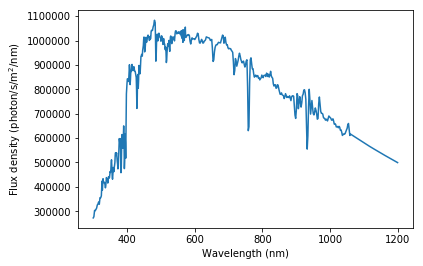

In [13]:
%pylab inline
wavel = np.arange(300.,1200.)
fname = pkg_resources.resource_filename('crispy', 'Inputs') + '/bpgs/bpgs_36.fits'
spectrum = input_star(fname,5,wavel)
plt.plot(wavel,spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux density (photon/s/m$^2$/nm)')